In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.options.display.max_rows=300

In [27]:
tt=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\5-Churns\all_data.csv')

In [29]:
train=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\5-Churns\train_not_churned.csv')
submission=pd.read_csv(r'C:\Users\enesm\OneDrive\Masaüstü\KAGGLE\Iyzico\Data\5-Churns\submission_with_churns.csv')

In [31]:
tt

,merchant_id,net_payment_count,date,is_train,category,flag,active_months
0,merchant_43992,4997.0,2020-01-01,True,1283,1,45
1,merchant_47611,19878.0,2020-01-01,True,508,1,45
2,merchant_26604,2528.0,2020-01-01,True,814,1,45
3,merchant_50657,89.0,2020-01-01,True,137,1,45
4,merchant_60635,71957.0,2020-01-01,True,274,0,42
...,...,...,...,...,...,...,...
369317,merchant_5038,NaN,2023-12-01,False,109,0,12
369318,merchant_49937,NaN,2023-12-01,False,405,1,26
369319,merchant_6213,NaN,2023-12-01,False,347,0,5
369320,merchant_35969,NaN,2023-12-01,False,127,0,1


In [32]:
tt['date']=pd.to_datetime(tt['date'])
tt.sort_values(by=['merchant_id', 'date'], inplace=True)
tt

,merchant_id,net_payment_count,date,is_train,category,flag,active_months
112598,merchant_1,3.0,2021-08-01,True,727,0,2
209734,merchant_1,3.0,2022-10-01,True,727,0,2
310281,merchant_1,NaN,2023-10-01,False,727,0,2
336341,merchant_1,NaN,2023-11-01,False,727,0,2
362401,merchant_1,NaN,2023-12-01,False,727,0,2
...,...,...,...,...,...,...,...
239518,merchant_9993,3.0,2023-02-01,True,799,0,6
267851,merchant_9993,4.0,2023-06-01,True,799,0,6
304667,merchant_9993,NaN,2023-10-01,False,799,0,6
330727,merchant_9993,NaN,2023-11-01,False,799,0,6


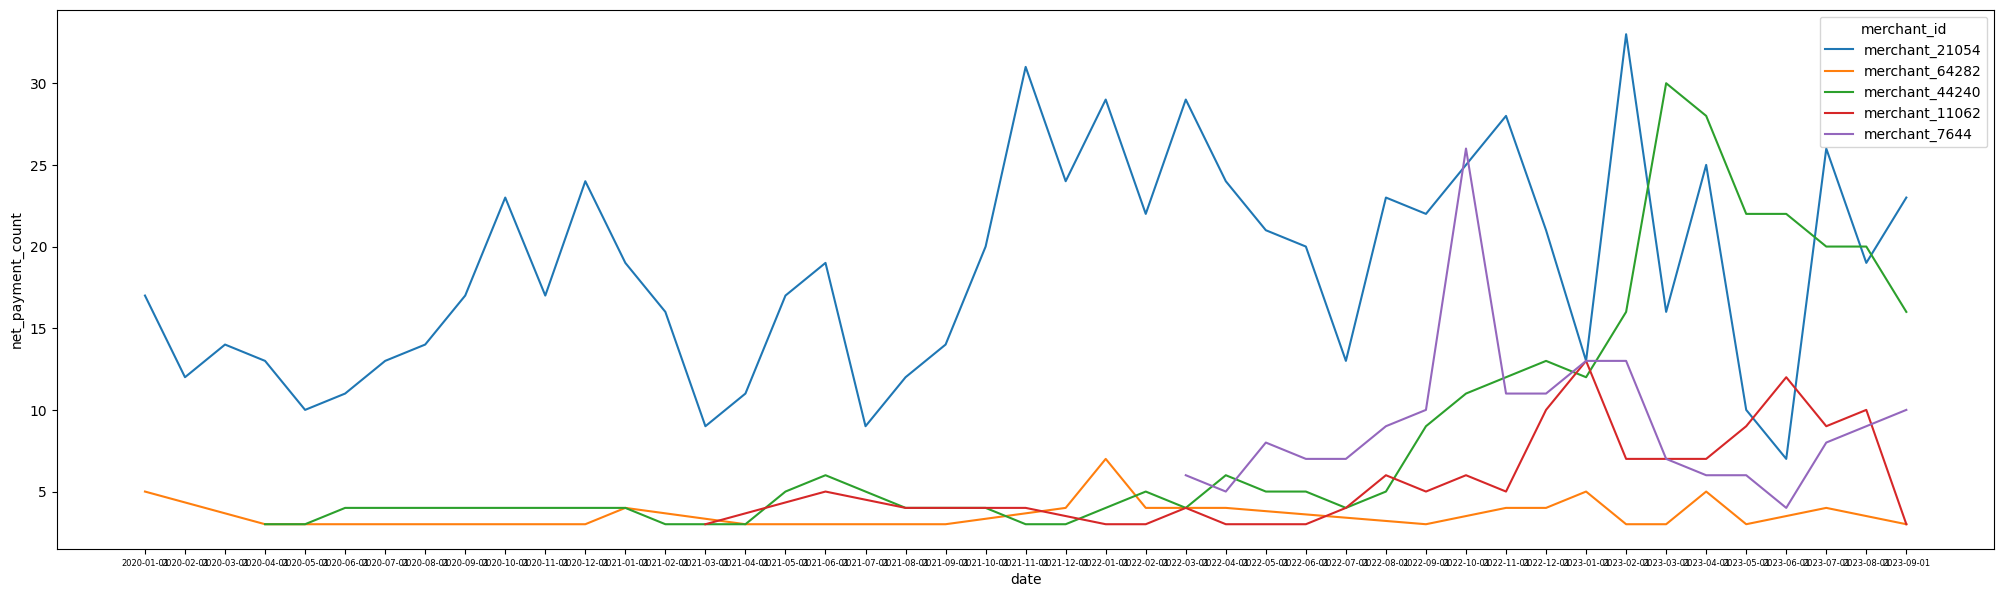

In [33]:
plt.figure(figsize=(25,7))
# Now create your line plot with Seaborn
sns.lineplot(data=train[train['category']==38], x='date', y='net_payment_count',hue='merchant_id')
plt.tick_params(axis='x',labelsize=6)
# Finally, display the plot
plt.show()

In [5]:
train

,merchant_id,net_payment_count,date,is_train,category,flag,active_months
75994,merchant_10000,3.0,2022-05-01,True,245,1,11
79950,merchant_10000,4.0,2022-06-01,True,245,1,11
105786,merchant_10000,10.0,2022-12-01,True,245,1,11
110515,merchant_10000,6.0,2023-01-01,True,245,1,11
115240,merchant_10000,4.0,2023-02-01,True,245,1,11
...,...,...,...,...,...,...,...
130625,merchant_9991,7.0,2023-05-01,True,476,1,16
135976,merchant_9991,10.0,2023-06-01,True,476,1,16
141519,merchant_9991,15.0,2023-07-01,True,476,1,16
147269,merchant_9991,9.0,2023-08-01,True,476,1,16


# Lag 1

In [34]:
def lag_with_month_check(group):
    group['lag_1_corrected'] = group['net_payment_count'].shift(1)
    group['prev_date'] = group['date'].shift(1)

    one_month = pd.DateOffset(months=1)
    group['lag_1_corrected'] = group.apply(lambda row: row['lag_1_corrected'] if row['prev_date'] == row['date'] - one_month else np.nan, axis=1)

    return group.drop(columns='prev_date').reset_index(drop=True)

# Apply the function and reset the index
tt = tt.groupby('merchant_id').apply(lag_with_month_check).reset_index(drop=True)


# Lag2

In [35]:
def lag_with_month_check(group):
    group['lag_2_corrected'] = group['net_payment_count'].shift(2)
    group['prev_date'] = group['date'].shift(2)

    one_month = pd.DateOffset(months=2)
    group['lag_2_corrected'] = group.apply(lambda row: row['lag_2_corrected'] if row['prev_date'] == row['date'] - one_month else np.nan, axis=1)

    return group.drop(columns='prev_date').reset_index(drop=True)

# Apply the function and reset the index
tt = tt.groupby('merchant_id').apply(lag_with_month_check).reset_index(drop=True)


# Lag 3 


In [36]:
def lag_with_month_check(group):
    group['lag_3_corrected'] = group['net_payment_count'].shift(3)
    group['prev_date'] = group['date'].shift(3)

    one_month = pd.DateOffset(months=3)
    group['lag_3_corrected'] = group.apply(lambda row: row['lag_3_corrected'] if row['prev_date'] == row['date'] - one_month else np.nan, axis=1)

    return group.drop(columns='prev_date').reset_index(drop=True)

# Apply the function and reset the index
tt = tt.groupby('merchant_id').apply(lag_with_month_check).reset_index(drop=True)


In [38]:
tt.head(100)

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected
0,merchant_1,3.0,2021-08-01,True,727,0,2,NaN,NaN,NaN
1,merchant_1,3.0,2022-10-01,True,727,0,2,NaN,NaN,NaN
2,merchant_1,NaN,2023-10-01,False,727,0,2,NaN,NaN,NaN
3,merchant_1,NaN,2023-11-01,False,727,0,2,NaN,NaN,NaN
4,merchant_1,NaN,2023-12-01,False,727,0,2,NaN,NaN,NaN
5,merchant_10,6.0,2021-11-01,True,180,0,6,NaN,NaN,NaN
6,merchant_10,24.0,2021-12-01,True,180,0,6,6.0,NaN,NaN
7,merchant_10,15.0,2022-01-01,True,180,0,6,24.0,6.0,NaN
8,merchant_10,7.0,2022-02-01,True,180,0,6,15.0,24.0,6.0
9,merchant_10,9.0,2022-03-01,True,180,0,6,7.0,15.0,24.0


# Rolling Mean 


# Roll 3 

In [39]:
temp=tt.copy()
temp

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected
0,merchant_1,3.0,2021-08-01,True,727,0,2,NaN,NaN,NaN
1,merchant_1,3.0,2022-10-01,True,727,0,2,NaN,NaN,NaN
2,merchant_1,NaN,2023-10-01,False,727,0,2,NaN,NaN,NaN
3,merchant_1,NaN,2023-11-01,False,727,0,2,NaN,NaN,NaN
4,merchant_1,NaN,2023-12-01,False,727,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
369317,merchant_9993,3.0,2023-02-01,True,799,0,6,3.0,3.0,3.0
369318,merchant_9993,4.0,2023-06-01,True,799,0,6,NaN,NaN,NaN
369319,merchant_9993,NaN,2023-10-01,False,799,0,6,NaN,NaN,NaN
369320,merchant_9993,NaN,2023-11-01,False,799,0,6,NaN,NaN,NaN


In [49]:
import pandas as pd
import numpy as np

# Assuming 'temp' is your DataFrame and it has columns 'merchant_id', 'date', and 'net_payment_count'
# Ensure 'date' is in datetime format
temp['date'] = pd.to_datetime(temp['date'])

# Set the window size
window_size = 3

# Define a custom function for rolling mean calculation
def rolling_mean_consecutive_months(group):
    group = group.sort_values('date')
    group['rol_3'] = np.nan

    for i in range(window_size - 1, len(group)):
        # Extract the relevant dates for the window
        dates = group['date'].iloc[i - window_size + 1:i + 1]

        # Check if the dates are consecutive months
        if all(dates.iloc[j + 1] - pd.DateOffset(months=1) == dates.iloc[j] for j in range(len(dates) - 1)):
            group.iloc[i, group.columns.get_loc('rol_3')] = group['net_payment_count'].iloc[i - window_size + 1:i + 1].mean()

    return group

# Apply the custom function to each group
temp = temp.groupby('merchant_id').apply(rolling_mean_consecutive_months).reset_index(drop=True)


# Roll 6 

In [50]:
import pandas as pd
import numpy as np

# Assuming 'temp' is your DataFrame and it has columns 'merchant_id', 'date', and 'net_payment_count'
# Ensure 'date' is in datetime format
temp['date'] = pd.to_datetime(temp['date'])

# Set the window size
window_size = 6

# Define a custom function for rolling mean calculation
def rolling_mean_consecutive_months(group):
    group = group.sort_values('date')
    group['rol_6'] = np.nan

    for i in range(window_size - 1, len(group)):
        # Extract the relevant dates for the window
        dates = group['date'].iloc[i - window_size + 1:i + 1]

        # Check if the dates are consecutive months
        if all(dates.iloc[j + 1] - pd.DateOffset(months=1) == dates.iloc[j] for j in range(len(dates) - 1)):
            group.iloc[i, group.columns.get_loc('rol_6')] = group['net_payment_count'].iloc[i - window_size + 1:i + 1].mean()

    return group

# Apply the custom function to each group
temp = temp.groupby('merchant_id').apply(rolling_mean_consecutive_months).reset_index(drop=True)


# Roll 12 

In [51]:
import pandas as pd
import numpy as np

# Assuming 'temp' is your DataFrame and it has columns 'merchant_id', 'date', and 'net_payment_count'
# Ensure 'date' is in datetime format
temp['date'] = pd.to_datetime(temp['date'])

# Set the window size
window_size = 12

# Define a custom function for rolling mean calculation
def rolling_mean_consecutive_months(group):
    group = group.sort_values('date')
    group['rol_12'] = np.nan

    for i in range(window_size - 1, len(group)):
        # Extract the relevant dates for the window
        dates = group['date'].iloc[i - window_size + 1:i + 1]

        # Check if the dates are consecutive months
        if all(dates.iloc[j + 1] - pd.DateOffset(months=1) == dates.iloc[j] for j in range(len(dates) - 1)):
            group.iloc[i, group.columns.get_loc('rol_12')] = group['net_payment_count'].iloc[i - window_size + 1:i + 1].mean()

    return group

# Apply the custom function to each group
temp = temp.groupby('merchant_id').apply(rolling_mean_consecutive_months).reset_index(drop=True)


In [54]:
temp.head(300)

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,lag_2_corrected,lag_3_corrected,rol_3,rol_6,rol_12
0,merchant_1,3.0,2021-08-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
1,merchant_1,3.0,2022-10-01,True,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
2,merchant_1,NaN,2023-10-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,merchant_1,NaN,2023-11-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
4,merchant_1,NaN,2023-12-01,False,727,0,2,NaN,NaN,NaN,NaN,NaN,NaN
5,merchant_10,6.0,2021-11-01,True,180,0,6,NaN,NaN,NaN,NaN,NaN,NaN
6,merchant_10,24.0,2021-12-01,True,180,0,6,6.0,NaN,NaN,NaN,NaN,NaN
7,merchant_10,15.0,2022-01-01,True,180,0,6,24.0,6.0,NaN,15.000000,NaN,NaN
8,merchant_10,7.0,2022-02-01,True,180,0,6,15.0,24.0,6.0,15.333333,NaN,NaN
9,merchant_10,9.0,2022-03-01,True,180,0,6,7.0,15.0,24.0,10.333333,NaN,NaN


In [56]:
temp.to_csv('featured_all.csv',index=False)

In [ ]:
train.reset_index(drop=True, inplace=True)
train

,merchant_id,net_payment_count,date,is_train,category,flag,active_months,lag_1_corrected,valid_month,rolling_mean
0,merchant_10000,3.0,2022-05-01,True,245,1,11,NaN,1,NaN
1,merchant_10000,4.0,2022-06-01,True,245,1,11,3.0,1,NaN
2,merchant_10000,10.0,2022-12-01,True,245,1,11,NaN,1,NaN
3,merchant_10000,6.0,2023-01-01,True,245,1,11,10.0,1,NaN
4,merchant_10000,4.0,2023-02-01,True,245,1,11,6.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
156316,merchant_9991,7.0,2023-05-01,True,476,1,16,8.0,1,NaN
156317,merchant_9991,10.0,2023-06-01,True,476,1,16,7.0,1,NaN
156318,merchant_9991,15.0,2023-07-01,True,476,1,16,10.0,1,NaN
156319,merchant_9991,9.0,2023-08-01,True,476,1,16,15.0,1,NaN


In [ ]:
train.rolling_mean.value_counts()

Series([], Name: count, dtype: int64)